# Dataset Balancing using pandas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot
path = "./dataJoe/"

In [ ]:
# Don't run this line and the next 3 ya hamo w ya adham
df =pd.read_csv(path+'dataset.csv')
classG = df[df['class'] == 'g']
classH = df[df['class'] == 'h']
countG, countH = df['class'].value_counts()

In [ ]:
classGUnder = classG.sample(countH)

In [ ]:
newDataset = pd.concat([classGUnder, classH])

In [ ]:
df.to_csv(path+'balanced_dataset.csv',index=True)

# Reading Data without recreating it each time

In [2]:
newDataset = pd.read_csv(path+'balanced_dataset.csv')

# Data Split

In [3]:
traindf, testdf = train_test_split(newDataset, test_size=0.3,random_state=42,shuffle=True)

In [4]:
traindf.to_csv(path+'train_dataset.csv',index=True)
testdf.to_csv(path+'test_dataset.csv',index=True)
x= newDataset.drop('class',axis=1) # 1 for column, 0 for index
y= newDataset['class']
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3,random_state=42,shuffle=True)

# Importing the models

In [5]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier


# Decision Tree

In [6]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [7]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       1.00      1.00      1.00      3705
           h       1.00      1.00      1.00      2001

    accuracy                           1.00      5706
   macro avg       1.00      1.00      1.00      5706
weighted avg       1.00      1.00      1.00      5706



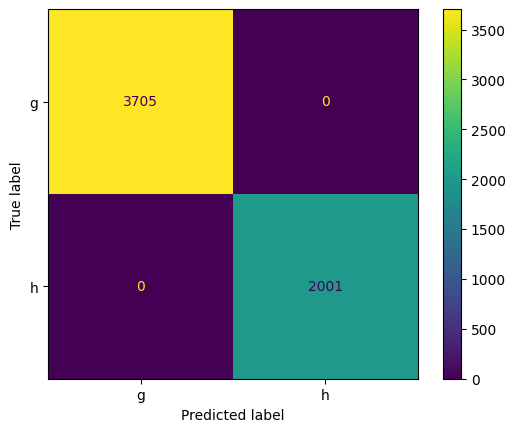

In [8]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()

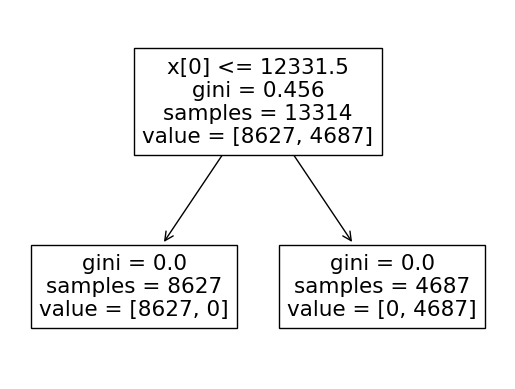

In [9]:
tree.plot_tree(model)
plt.show()

# AdaBoost

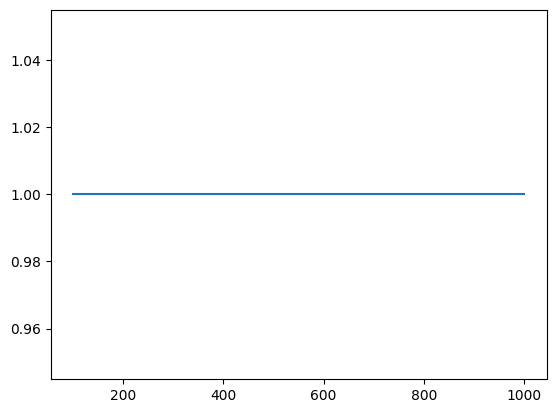

In [10]:
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
greatestScore = 0 
greatestN = 0
scores = []
for n in n_estimators:
    model = AdaBoostClassifier(n_estimators=n)
    z = cross_val_score(model, x_train, y_train, cv=10)
    scores.append(z.mean())
    score = z.mean()
    if score > greatestScore:
        greatestScore = score
        greatestN = n
plt.plot(n_estimators,scores)
plt.show()

In [11]:
greatestN

100

              precision    recall  f1-score   support

           g       1.00      1.00      1.00      3705
           h       1.00      1.00      1.00      2001

    accuracy                           1.00      5706
   macro avg       1.00      1.00      1.00      5706
weighted avg       1.00      1.00      1.00      5706



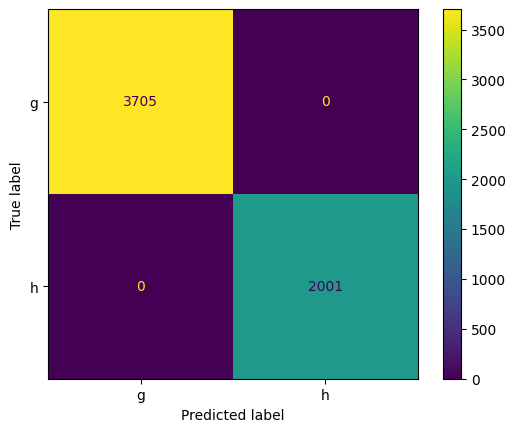

In [12]:

model = AdaBoostClassifier(n_estimators=300)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show() 

# KNN

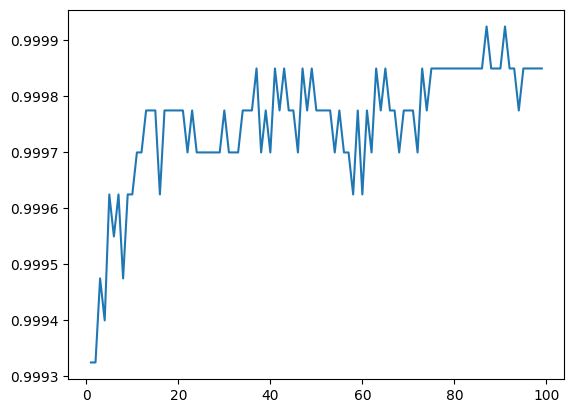

In [13]:
greatestScore = 0
greatestK = 0
scores = []
for k in range(1,100):
    model = KNeighborsClassifier(n_neighbors=k)
    # scores = cross_validate(model, x_train, y_train, cv=10,scoring='accuracy')
    # score = scores['test_score'].mean()
    z = cross_val_score(model, x_train, y_train, cv=10)
    scores.append(z.mean())
    score = z.mean()
    if score > greatestScore:
        greatestScore = score
        greatestK = k
plt.plot(range(1,100),scores)
plt.show()

In [14]:
greatestK

87

In [15]:
model = KNeighborsClassifier(n_neighbors=37)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       1.00      1.00      1.00      3705
           h       1.00      1.00      1.00      2001

    accuracy                           1.00      5706
   macro avg       1.00      1.00      1.00      5706
weighted avg       1.00      1.00      1.00      5706



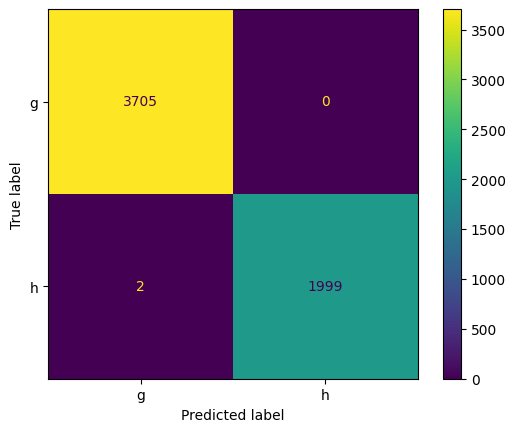

In [17]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()

# Random Forest

# Naive Bayes

In [18]:
model = GaussianNB()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       0.87      0.98      0.92      3705
           h       0.96      0.73      0.83      2001

    accuracy                           0.90      5706
   macro avg       0.91      0.86      0.88      5706
weighted avg       0.90      0.90      0.89      5706



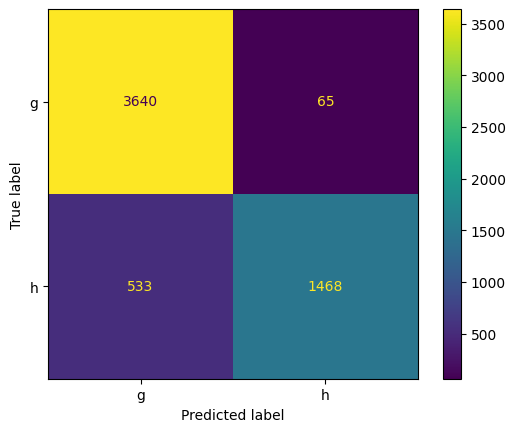

In [20]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=model.classes_).plot()
plt.show()